<a href="https://colab.research.google.com/github/enrique-carbo/Data-Science/blob/main/Seccion10_Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Lineal con Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/


In [ ]:
casas = pd.read_csv('sample_data/USA_Housing.csv')

In [ ]:
casas.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
casas.columns[0]

'Avg. Area Income'

In [ ]:
casas['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

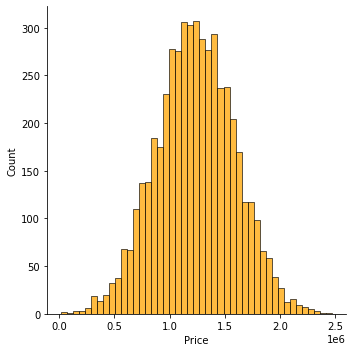

In [ ]:
sns.displot(casas['Price'], color='Orange')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


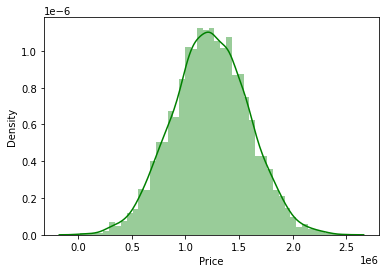

In [ ]:
sns.distplot(casas['Price'], color='Green')

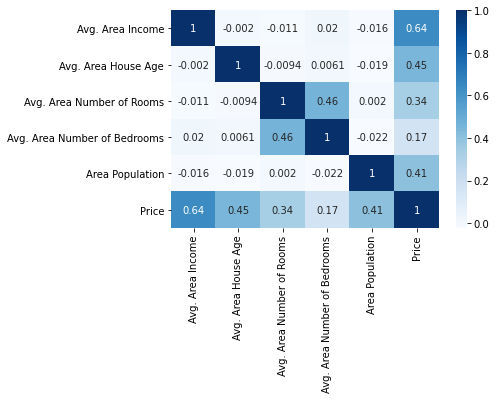

In [ ]:
sns.heatmap(casas.corr(), annot=True, cmap="Blues")

### Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
casas.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
X = casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [ ]:
Y = casas[['Price']]
Y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


## Separación del Dataset en Train y Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1840,55245.337288,3.965745,8.961106,4.38,43557.943435
2115,62305.638407,6.490769,7.647362,3.19,47066.617420
4437,77345.472379,5.407515,8.243178,3.11,26706.911029
1146,65846.171039,6.385374,6.804131,3.18,28214.363551
2486,69350.793357,6.910415,8.288048,4.29,36779.058567
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [ ]:
Y_train

,Price
1840,8.814461e+05
2115,1.375771e+06
4437,1.137069e+06
1146,9.289500e+05
2486,1.392084e+06
...,...
4426,1.023944e+06
466,1.223101e+06
3092,1.318598e+06
3772,1.708631e+06


## Entrenamiento del modelo

In [ ]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluación del modelo  
Modelo entrenado => predicciones, predice un valor Y por cada X_test

In [ ]:
from sklearn import metrics
predicciones = lrm.predict(X_test)
predicciones

array([[1308536.13592598],
       [1237122.72746455],
       [1243835.62817086],
       ...,
       [1457119.79297219],
       [1483428.95309288],
       [1047510.59737212]])

In [ ]:
Y_test

,Price
1501,1.339096e+06
2586,1.251794e+06
2653,1.340095e+06
1055,1.431508e+06
705,1.042374e+06
...,...
3563,1.348222e+06
1538,1.309937e+06
1837,1.472887e+06
2380,1.409762e+06


### Gráfico para comparar los valores de la predicción (predicciones) con los valores reales de los datos de prueba (Y_test)

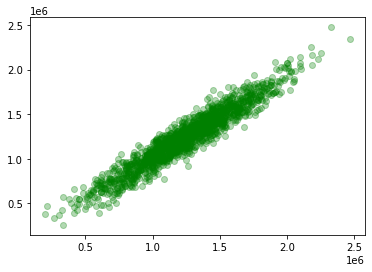

In [ ]:
plt.scatter(Y_test, predicciones, c="g", alpha=0.3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


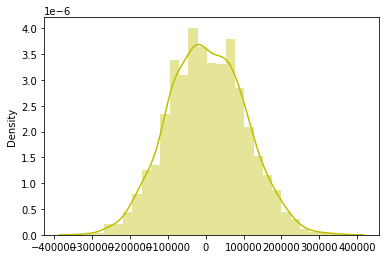

In [ ]:
sns.distplot(Y_test - predicciones, color='y')

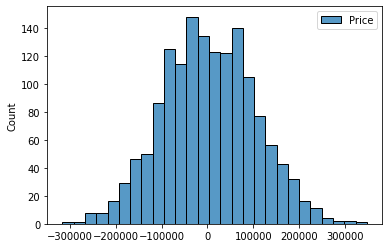

In [ ]:
sns.histplot(Y_test - predicciones)

### Mean Absolute Error (MAE): Media del valor absoluto de los errores

In [ ]:
metrics.mean_absolute_error(Y_test, predicciones)

81135.56609336883

### Mean Squared Error (MSE): Media de los errores al cuadrado

In [ ]:
metrics.mean_squared_error(Y_test, predicciones)

10068422551.400854

### Root Mean Square Error (RMSE): Raíz del error cuadrático medio

In [ ]:
np.sqrt(metrics.mean_squared_error(Y_test, predicciones))

100341.52954485423